In [201]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [202]:
def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        print("Error: Could not read image. Check path/filename.")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

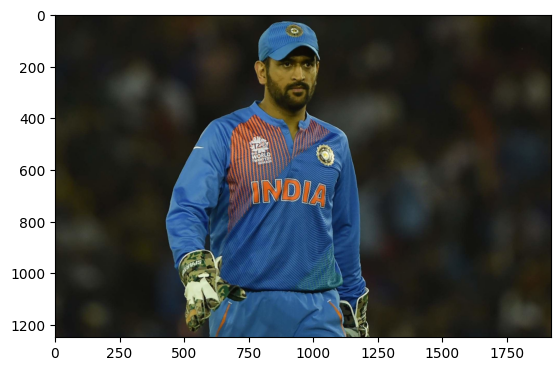

In [203]:
filename = "C:/Users/ABIR MAJUMDER/Downloads/images.jpeg"
read_file(filename)


In [204]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("C:/Users/ABIR MAJUMDER/Downloads/images.jpeg")
if img is None:
    raise FileNotFoundError("Image not found. Check the path/filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

org_img = np.copy(img)


# Create Edge Mask

In [205]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(
        gray_blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        line_size,
        blur_value
    )
    return edges

In [206]:
img = cv2.imread("C:/Users/ABIR MAJUMDER/Downloads/images.jpeg")
if img is None:
    raise FileNotFoundError("Image not found. Check the path/filename.")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)




In [207]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)

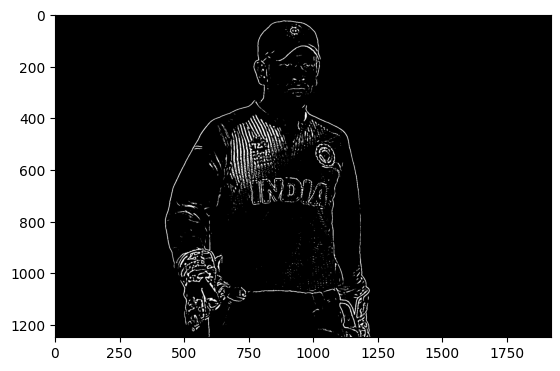

In [208]:
plt.imshow(edges, cmap="binary")
plt.show()

# Reduce the Color Pallete

In [209]:
def color_quantization(img, k):

    # Transform the image
    data = np.float32(img).reshape((-1,3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    ## Implementing K-Means

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

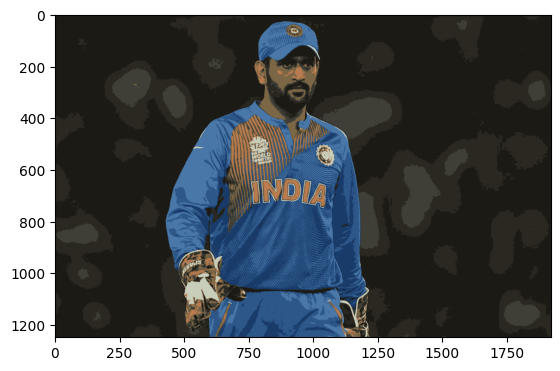

In [210]:
img = color_quantization(img, k=9)

plt.imshow(img)
plt.show()


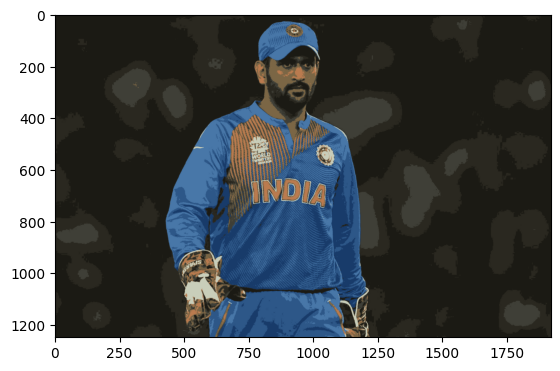

In [211]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the quantiz img

In [212]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges )

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("org_img")
    plt.show() 
 
 

    

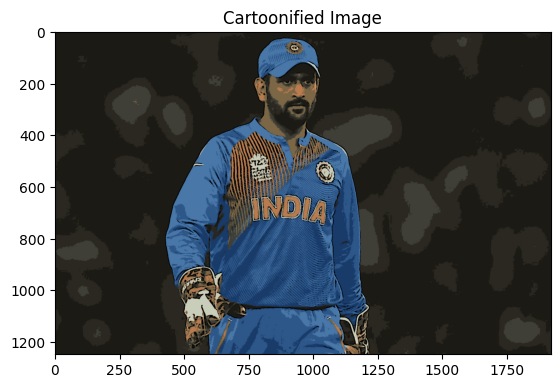

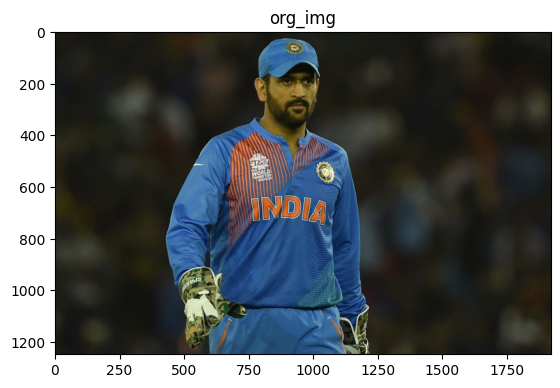

In [213]:
cartoon()